### numpy random data generation

#### numpy.random.rand(d0,d1,...,dn) 用来生成d0 x d1 x ... x dn 维的数组，数组的值在 \[0,1)之间。

In [1]:
import numpy as np

np.random.rand(3,2,2)

array([[[0.53496064, 0.50574823],
        [0.90008499, 0.87937148]],

       [[0.86621178, 0.27930121],
        [0.60327061, 0.33228349]],

       [[0.29786683, 0.09515983],
        [0.25626226, 0.44190338]]])

#### numpy.random.randn(d0, d1, ..., dn) 用来生成d0 x d1 x ... x dn 维的数组，数组的值服从$N(0，1)$ 的标准正态分布

In [2]:
np.random.randn(3,2)

array([[-0.23299014, -2.17487803],
       [ 0.53581168, -0.82161931],
       [ 0.55121244,  0.62852882]])

如果需要服从$N(\mu,\sigma^2)$ 的正态分布，只需在randn上每个生成的值x上做变换 $\sigma * x + u$ 即可。

In [3]:
# N(1,4) 的抽样数据
2 * np.random.randn(3,2) + 1

array([[ 2.06476341,  1.31682741],
       [-1.72191266,  1.37278502],
       [ 0.57167421, -1.3054119 ]])

#### randint(low\[,high,size]) 生成随机的大小为size的数据，size可以为整数，为矩阵维数，或者张量的维数。值位于半开区间[low, high)

In [4]:
# 维数为3x2的数据，取值范围为最大值为3的整数
np.random.randint(3, size=(3,2))

array([[0, 2],
       [2, 2],
       [2, 0]])

In [5]:
# data range [3,6), dimension 2x2
np.random.randint(3,6, size=(2,2))

array([[5, 3],
       [4, 4]])

#### random_integers(low\[, high, size]) 和randint()类似，区别在于取值范围是闭区间[low, high]

In [6]:
np.random.random_integers(3,6,size=(2,2))

<ipython-input-6-2900a2cdcc5d>:1: DeprecationWarning: This function is deprecated. Please call randint(3, 6 + 1) instead
  np.random.random_integers(3,6,size=(2,2))


array([[5, 3],
       [4, 6]])

#### random_sample([size]), 返回随机的浮点数，在半开区间\[0.0, 1.0)。如果是其他区间[a,b)， 可以加上变换$(b-a) * random\_sample([2])+ a$

In [7]:
(5-2) * np.random.random_sample([2,2]) + 2

array([[2.64381381, 3.36510978],
       [3.25777679, 3.28874086]])

### scikit-learn 随机数生成

都在datasets类中，和numpy比起来，可以用来生成适合特定机器学习模型的数据。常见的有：
- make_regression 生成回归模型的数据；
- make_hastie_10_2, make_classification, or make_multilabel_classification 生成分类模型数据
- make_blobs生成聚类模型数据；
- make_gaussian_quantiles生成分组多维正态分布的数据

#### make_regression 回归模型随机数据

make_regression 的几个关键参数有: n_samples(生成样本数)，n_features(样本特征数), noise(样本随机噪音), coef(是否返回回归系数）。

函数的输出按顺序为：样本特征(X)、样本输出(y)、回归系数(coef)。

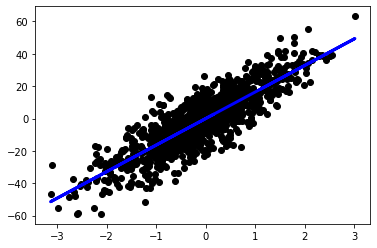

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_regression

X, y, coef = make_regression(n_samples = 1000, n_features = 1, noise = 10, coef = True)

# draw
plt.scatter(X, y, color = 'black')
plt.plot(X, X*coef, color = 'blue', linewidth = 3)

plt.xticks()
plt.yticks()

plt.show()

#### make_classification分类模型随机数据

make_classification 的几个关键参数有： **n_samples(生成样本数)、n_features(样本特征数)、n_redundant(冗余特征数)、n_classes(输出的类别数）。**

函数的输出按顺序为：X1为样本特征，Y1为样本类别输出。


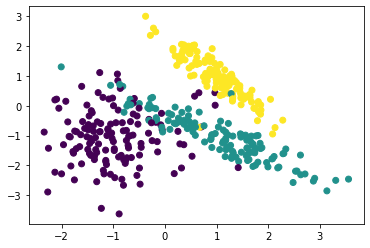

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_classification

# X1 为样本特征，Y1为样本类别输出，共400个样本，每个样本2个特征，输出有3个类别，没有冗余特征，每个类别一个簇
X1, Y1 = make_classification(n_samples = 400, n_features = 2, n_redundant = 0, n_clusters_per_class = 1, n_classes = 3)

# draw
plt.scatter(X1[:,0], X1[:,1], marker = 'o', c =  Y1)
plt.show()

#### make_blobs聚类模型随机数据

make_blobs 的关键参数有 **n_samples(生成样本数)、n_features(样本特征数)、centers(簇中心的个数或者自定义的簇中心)、cluster_std(簇中心方差，代表簇的聚合程度)。**

函数的输出按顺序为：X为样本特征，Y为样本簇类别。

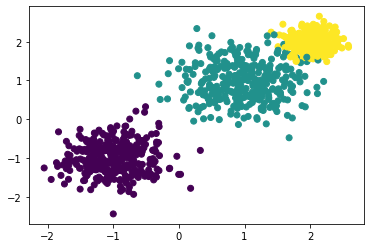

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

# X为样本特征，y为样本簇类别，共1000个样本，每个样本2个特征，共三个簇，中心分别在 [-1, -1], [1,1], [2,2], 簇方差分别为 [0.4, 0.5, 0.2]
X, y = make_blobs(n_samples = 1000, n_features = 2, centers= [[-1, -1], [1,1], [2,2]], cluster_std = [0.4, 0.5, 0.2])

# draw
plt.scatter(X[:,0], X[:,1], marker = 'o', c =  y)
plt.show()

#### make_gaussian_quantiles分组正态分布混合数据

make_gaussian_quantiles 的几个关键参数有**n_samples(生成样本数)、n_features(样本特征数)、mean(特征均值), cov(样本写方差的系数), n_classes(数据在正态分布中按分位数分配的组数）。**


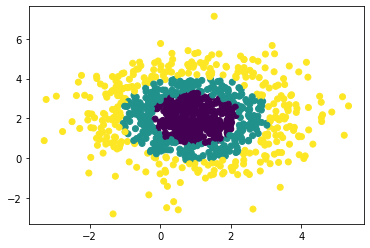

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_gaussian_quantiles

X1, Y1 = make_gaussian_quantiles(n_samples = 1000, n_features = 2, n_classes = 3, mean= [1,2], cov=2)


# draw
plt.scatter(X1[:,0], X1[:,1], marker = 'o', c =  Y1)
plt.show()